In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from helper import load_data, write_to_csv, set_sepcial_observation
import DataPreprocessor 
#from handcraft_logistic_regression import LogisticRegression

In [19]:
import importlib
importlib.reload(DataPreprocessor)

<module 'DataPreprocessor' from 'd:\\Coding\\NTU\\110-1\\EEML\\HW2\\DataPreprocessor.py'>

In [2]:
data_path = "./data/"
path_train = os.path.join(data_path, "train.csv")
path_test = os.path.join(data_path, "test.csv")
data_train, data_test = load_data(path_train, path_test)

In [3]:
DP = DataPreprocessor.DataPreprocessor()
X_train, y_train = DP.preprocess_train_data(data_train)
X_test= DP.preprocess_test_data(data_test)

(32561, 103)
(16281, 103)


/content/gdrive/MyDrive/EEML/HW2/DataPreprocessor.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat["native_country"] = data_cat["native_country"].astype(pd.CategoricalDtype(categories=self.all_native_countries))


In [4]:
print(X_train.shape)
print(X_test.shape)

(32561, 108)
(16281, 108)


# Modeling

In [24]:
cond1 = (data_test["education_num"] == 1)
cond2 = (data_test["workclass"] == "Never-worked")
special_index = data_test[cond1 | cond2].index.tolist()

# All features
## Numerical
- robust scaling
## Categorical
- one-hot

## KNN


In [5]:
k_max = round(np.sqrt(X_train.shape[0]))
k_range = list(range(20, k_max, 3))
param_grid = {
    "n_neighbors": k_range,
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [6]:
KNN = KNeighborsClassifier()
GS = GridSearchCV(KNN, 
    param_grid, 
    verbose = 1,
    cv = 5, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 29.7min finished


In [10]:
GS.score(X_train, y_train)

0.9999692884125181

In [14]:
GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='distance')

param_n_neighbors
20     0.798517
23     0.799008
26     0.799177
29     0.800152
32     0.799876
35     0.799929
38     0.799192
41     0.799162
44     0.798440
47     0.798263
50     0.797672
53     0.797557
56     0.796843
59     0.796666
62     0.796336
65     0.796144
68     0.795653
71     0.795215
74     0.794578
77     0.794301
80     0.793664
83     0.793334
86     0.792904
89     0.792651
92     0.792274
95     0.791998
98     0.791468
101    0.791253
104    0.790693
107    0.790347
110    0.789925
113    0.789710
116    0.789388
119    0.789104
122    0.788666
125    0.788466
128    0.787975
131    0.787576
134    0.787031
137    0.786754
140    0.786316
143    0.786094
146    0.785633
149    0.785395
152    0.784904
155    0.784681
158    0.784259
161    0.784113
164    0.783675
167    0.783476
170    0.783192
173    0.783046
176    0.782792
179    0.782554
Name: mean_test_score, dtype: float64


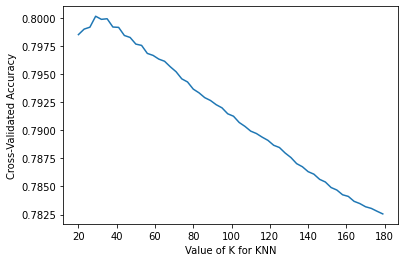

In [8]:
GS_result = pd.DataFrame(GS.cv_results_)
print(GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean())

k_idx = GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean().index
acc = GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean().values

plt.plot(k_idx, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [26]:
y_pred = GS.predict(X_test)
print(f"Before hard labeling, ratio of income >50K = {y_pred.sum() / y_pred.shape[0]}")
y_pred = set_sepcial_observation(y_pred, special_index)
print(f"After hard labeling, ratio of income >50K = {y_pred.sum() / y_pred.shape[0]}")

Before hard labeling, ratio of income >50K = 0.07579387015539586
After hard labeling, ratio of income >50K = 0.07573244886677723


In [27]:
#記得改名字
file_name = 'submission_1025_4.csv'
write_to_csv(y_pred, file_name)

## K-means

# Selected features
## Numerical
- robust scaling
## Categorical
- one-hot
- remove some features and categories

## KNN

In [66]:
k_max = round(np.sqrt(X_train.shape[0]))
k_range = list(range(20, k_max, 3))
param_grid = {
    "n_neighbors": k_range,
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [67]:
KNN = KNeighborsClassifier()
GS = GridSearchCV(KNN, 
    param_grid, 
    verbose = 1,
    cv = 5)

In [68]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 15.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [69]:
GS.score(X_train, y_train)

0.8689044088238009

In [72]:
GS.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

param_n_neighbors
25    0.858213
27    0.858175
29    0.858013
31    0.858136
33    0.858167
35    0.858321
37    0.858190
39    0.858121
41    0.858090
43    0.857859
45    0.858313
47    0.858344
49    0.858136
51    0.857959
Name: mean_test_score, dtype: float64


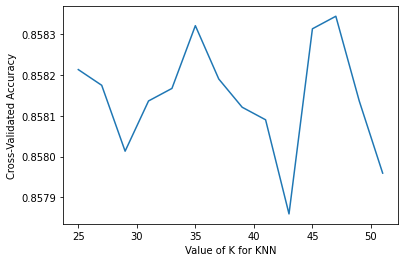

In [73]:
GS_result = pd.DataFrame(GS.cv_results_)
print(GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean())

k_idx = GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean().index
acc = GS_result.groupby(["param_n_neighbors"])['mean_test_score'].mean().values

plt.plot(k_idx, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [74]:
y_pred = GS.predict(X_test)
print(f"Before hard labeling, ratio of income >50K = {y_pred.sum() / y_pred.shape[0]}")
y_pred = set_sepcial_observation(y_pred, special_index)
print(f"After hard labeling, ratio of income >50K = {y_pred.sum() / y_pred.shape[0]}")

Before hard labeling, ratio of income >50K = 0.19783797064062403
After hard labeling, ratio of income >50K = 0.1977765493520054


In [ ]:
#記得改名字
file_name = 'submission_1025_3.csv'
write_to_csv(y_pred, file_name)

## K-means

# Selected featuers
- Only use numerical features

k_max = round(np.sqrt(X_train.shape[0]))
k_range = list(range(20, k_max, 3))
param_grid = {
    "n_neighbors": k_range,
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}